# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [112]:
#1
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/penguins_size.csv')
data.sample(10)

#menggunakan .sample untuk menampilkan random data.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,MALE
35,Adelie,Dream,39.2,21.1,196.0,4150.0,MALE
31,Adelie,Dream,37.2,18.1,178.0,3900.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
301,Gentoo,Biscoe,52.5,15.6,221.0,5450.0,MALE
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [113]:
#2
data.info()
#Terdapat total 7 kolom dengan total 344 data dan juga terdapat missing values pada kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, dan body_mass_g.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [114]:
#3
data.describe()
# Describe menampilkan count, mean, standar deviation, min, max, 25%, 50%, dan 75% dari atribut yang berupa angka.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [115]:
#4
print(data['species'].value_counts(dropna=False))
print(data['island'].value_counts(dropna=False))
print(data['sex'].value_counts(dropna=False))

# .value_counts berfungsi untuk menghitung frequensi nilai di kolom yang dipilih
# dropna=False memastikan bahwa nilai NaN juga ikut dihitung.

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [116]:
#5
data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].mode()[0], inplace=True)
data['sex'] = data['sex'].replace('.', data['sex'].mode()[0])

data.isnull().sum()

# Menggunakan .mean untuk mengisi missing value dengan nilai rata-rata dari kolom yang dituju
# Menggunakan .mode untuk mengisi missing value dengan nilai yang paling sering muncul

<ipython-input-116-211464ccc131>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)
<ipython-input-116-211464ccc131>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-117-f281dfe74c60>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_bodyMass.index, y=avg_bodyMass.values, palette='deep')


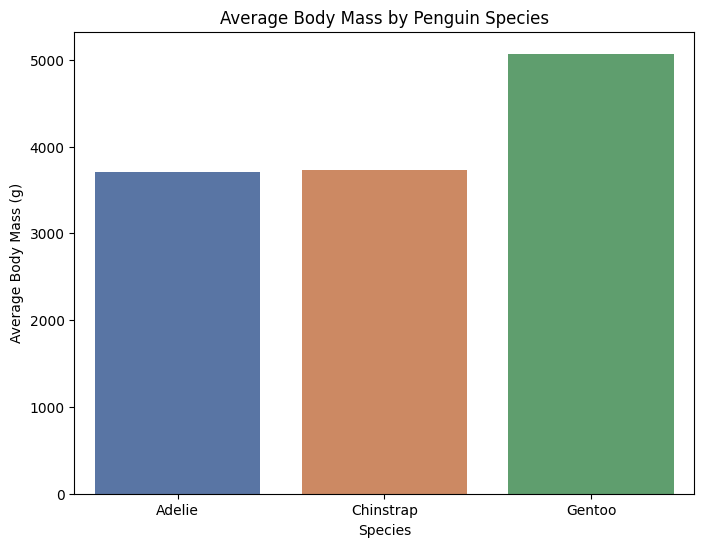

In [117]:
#6
avg_bodyMass = data.groupby('species')['body_mass_g'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_bodyMass.index, y=avg_bodyMass.values, palette='deep')

plt.title('Average Body Mass by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Average Body Mass (g)')

plt.show()

# Menggunakan bar chart untuk menampilkan berat rata-rata dari 3 species penguin.
# Species penguin terberat adalah Gentoo dengan berat rata-rata 5 kg lebih sedikit. Penguin jenis Adelie dan Chinstrap memiliki rata-rata berat badan yang hampir sama.

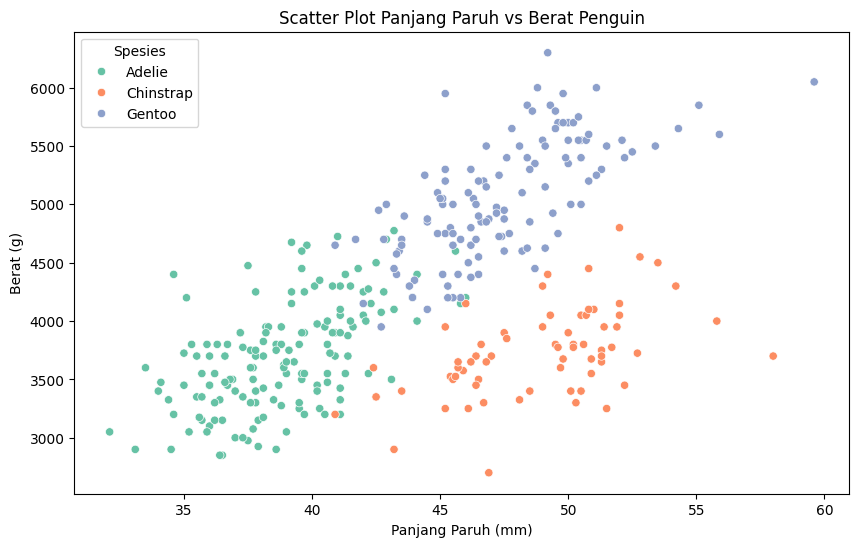

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', hue='species', data=data, palette='Set2')
plt.title('Scatter Plot Panjang Paruh vs Berat Penguin')
plt.xlabel('Panjang Paruh (mm)')
plt.ylabel('Berat (g)')
plt.legend(title='Spesies')
plt.show()

# Menggunakan scatter plot untuk menampilkan berat rata-rata dari 3 species penguin.
# Species Adelie (titik hijau) menunjukkan bahwa mereka cenderung lebih ringan dan memiliki panjang paruh yang lebih pendek.
# Species Chinstrap (titik oranye) terletak di tengah, menunjukkan berat dan panjang paruh yang sedang.
# Species Gentoo (titik biru) berada di bagian atas dan lebih ke kanan, menunjukkan bahwa penguin spesies ini memiliki panjang paruh dan berat yang paling besar dibandingkan dengan spesies lainnya

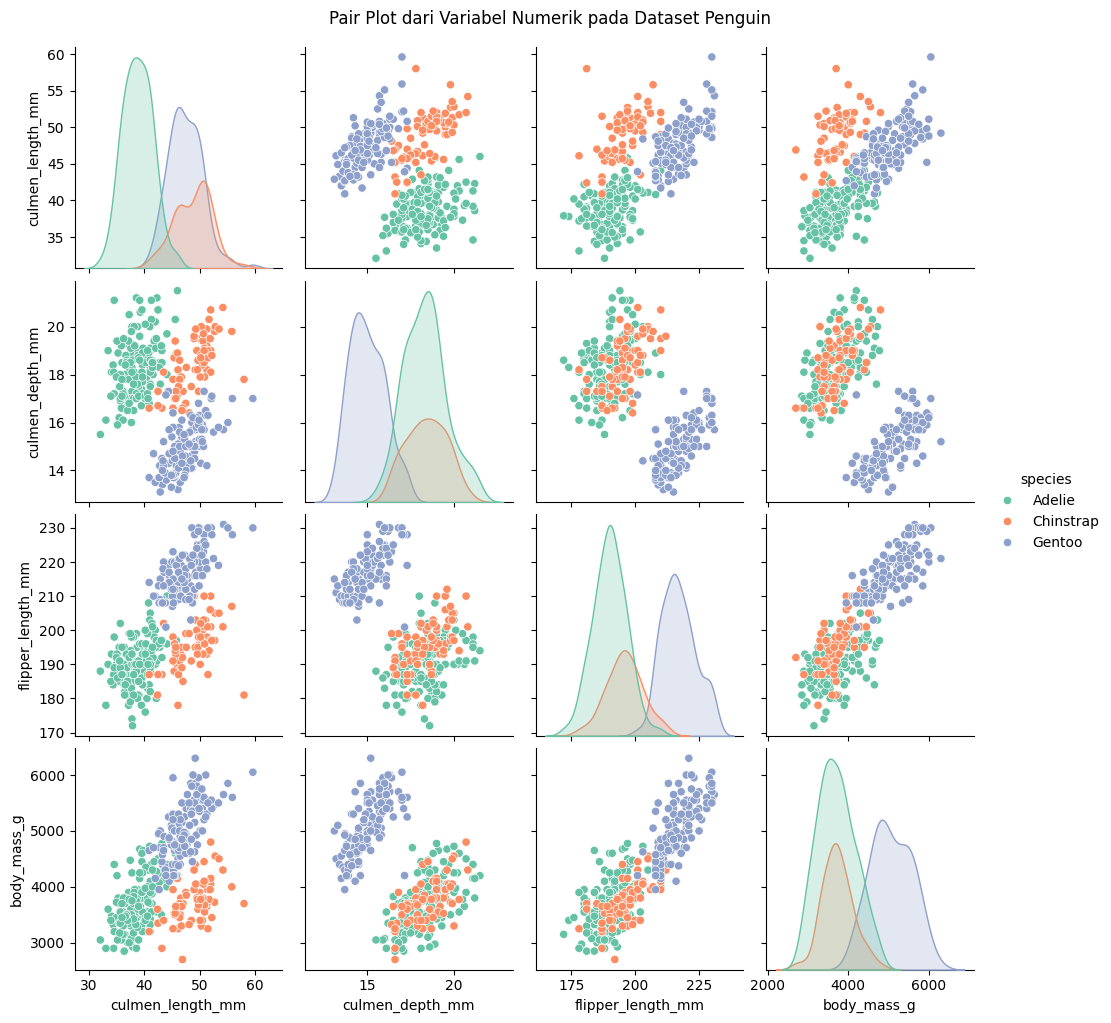

In [119]:
sns.pairplot(data, hue='species', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot dari Variabel Numerik pada Dataset Penguin', y=1.02)
plt.show()

# Species Gentoo memiliki massa tubuh dan panjang sirip yang jauh lebih besar dibandingkan dengan Chinstrap dan Adelie.
# Spesies Adelie dan Chinstrap memiliki distribusi variabel yang lebih mirip dibandingkan dengan Gentoo, terutama pada variabel seperti culmen_length_mm dan culmen_depth_mm.

7. Check unique value of our target variable

In [120]:
#7
print(data['species'].unique())
# .unique akan menampilkan nilai unik yang muncul di suatu kolom

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [121]:
#8
label_encoder = LabelEncoder()

data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'])

data.head()

# menggunakan LabelEncoder untuk mengubah kolom kategorikal menjadi numerik

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0


9. encode the target column and display the results

In [122]:
#9
data['species'] = label_encoder.fit_transform(data['species'])

data.head()

# menggunakan LabelEncoder untuk mengubah kolom target menjadi numerik

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


10. create a heatmap to see the correlation and explain the conclusion

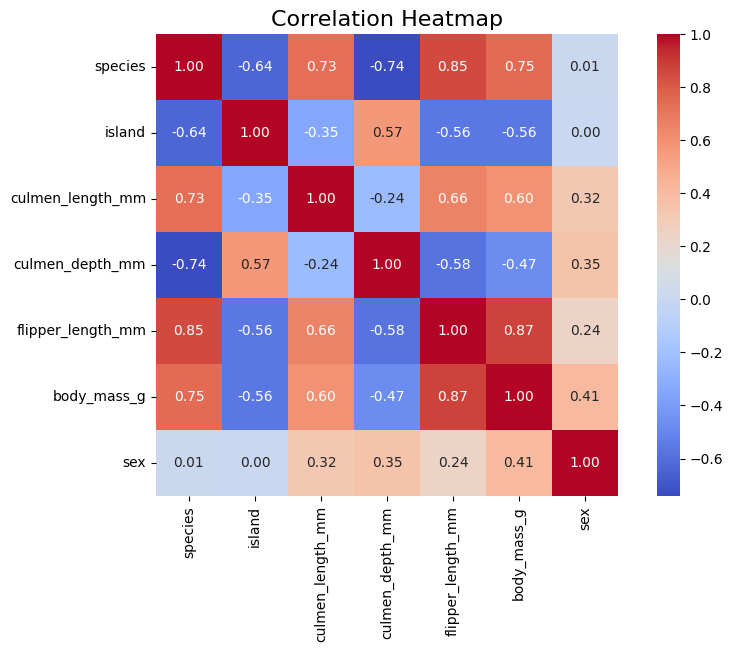

In [123]:
#10
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
# Dari heatmap dibawah dapat dilihat bahwa species mempengaruhi ukuran dari penguin seperti panjang paruh, sirip, dan berat badannya.
# Selain itu island memiliki korelasi rendah dengan kolom lainnya. Yang berarti island tidak mempengaruhi ukuran fisik penguin maupun gendernya.
# Body mass juga memiliki korelasi yang cukup tinggi terhadap panjang sirip yaitu sebesar 0.87.

## Machine Learning

1. Splitting X and y

In [124]:
#1
X = data.drop(['species'], axis = 1)
y = data['species']

# X digunakan untuk membuat prediksi, y adalah target atau output yang ingin diprediksi.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [125]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Membagi dataset X dan y menjadi training dan testing data dengan pembagian 80% untuk training dan 20% untuk testing

In [126]:
#3
X_train.shape, X_test.shape
# Menampilkan ukuran atau dimensi dari data latih (X_train) dan data uji (X_test) dalam bentuk tuple.

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [127]:
#Criterion Entropy
#a
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [128]:
#b
y_pred_clf = clf.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria entropy.

In [129]:
#c
print(f'Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_clf):.4f}')
# Menampilkan akurasi dari kriteria entropy berdasarkan y_test dan y_pred_clf.

Model accuracy score with criterion entropy: 0.9275


In [130]:
#d
y_train_clf = clf.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_clf)
training_acc = accuracy_score(y_train, y_train_clf)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_clf, y_train, dan y_train_clf.
# Perbedaannya hanya selisih 0.05 atau 5% saja, yang menunjukkan bahwa model ini memiliki kemampuan generalisasi yang baik.

Training set score: 0.9709
Test set score: 0.9275


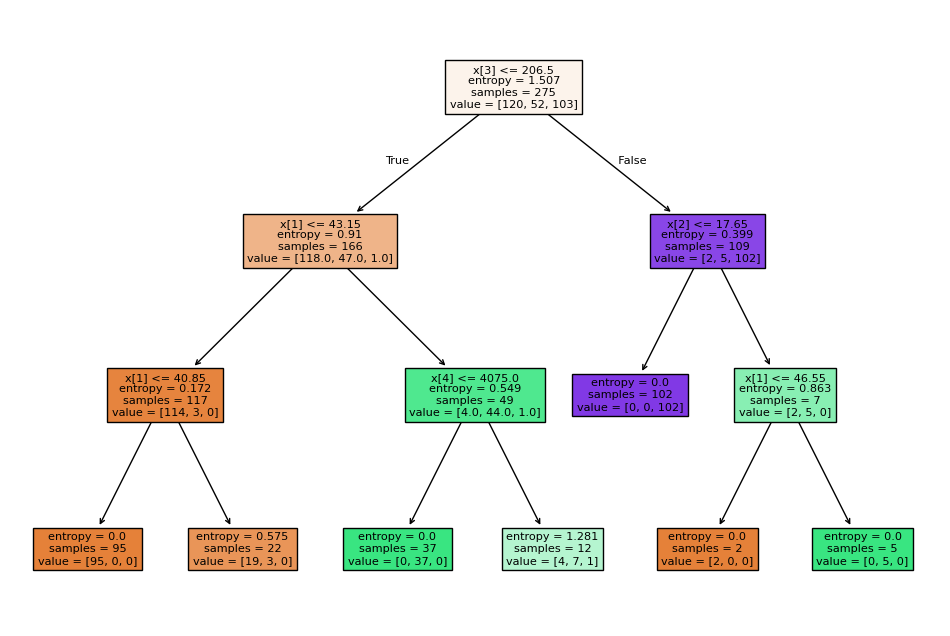

In [131]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

2. Criterion Gini index

In [132]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria gini index.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [133]:
#b
y_pred_gini = clf_gini.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria gini index.

In [134]:
#c
print(f'Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini):.4f}')
# Menampilkan akurasi dari kriteria gini berdasarkan y_test dan y_pred_gini.

Model accuracy score with criterion gini index: 0.9275


In [135]:
#d
y_train_gini = clf_gini.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_gini)
training_acc = accuracy_score(y_train, y_train_gini)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_gini, y_train, dan y_train_gini.
# Perbedaannya hanya selisih 0.05 atau 5% saja, yang menunjukkan bahwa model ini memiliki kemampuan generalisasi yang baik.

Training set score: 0.9709
Test set score: 0.9275


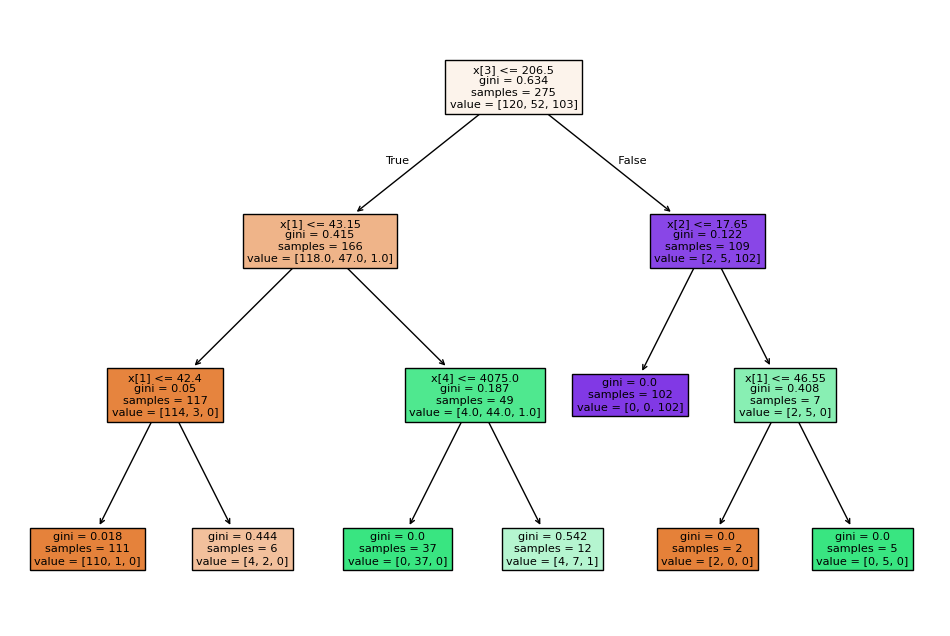

In [136]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [137]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_clf)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

# Menampilkan confusion matrix dari kriteria entropy dan kriteria gini index.

Confusion Matrix Entropy:
[[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]

Confusion Matrix Gini:
[[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [138]:
#g
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_clf))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

# Menampilkan classification report dari kriteria entropy dan kriteria gini index.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69


Classification Report Gini
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [139]:
#h

# Kriteria Gini maupun kriteria Entropy menghasilkan training set score yang sama yaitu 0.9709 / 97.09% dan test set score yaitu 0.9275 / 92.75%.
# Keduanya mencapai akurasi keseluruhan sebesar 93%, dengan metrik presisi, recall, dan F1-score yang serupa di semua kelas.
# Kelas 2 menunjukkan kinerja terbaik dengan presisi dan F1-score yang sempurna, sementara kelas 1 memiliki presisi yang lebih rendah, yang menunjukkan adanya kemungkinan kesalahan klasifikasi yang lebih tinggi.
# Secara keseluruhan, baik Entropi maupun Gini Index adalah pilihan yang baik untuk klasifikasi spesies penguin dalam dataset ini

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [140]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model dengan menggunakan Naive Bayes.

GaussianNB()

In [141]:
#b
y_pred_nb = nb.predict(X_test)
# Untuk menghasilkan prediksi menggunakan Naive Bayes.

In [142]:
#c
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_nb.

#d
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes:")
print(cm_nb)
# Menampilkan confusion matrix dari Naive Bayes.

Accuracy Score: 0.9710
Confusion Matrix Naive Bayes:
[[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [143]:
#e
print("Classification Report")
print(classification_report(y_test, y_pred_nb))
# Menampilkan classification report dari Naive Bayes.

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [144]:
#f

# Klasifikasi Naive Bayes memiliki tingkat akurasi yang tinggi yaitu 0.97 / 97%.
# Dari laporan klasifikasi menunjukkan bahwa semua kelas memiliki presisi, recall, dan F1-score yang tinggi, terutama kelas 2, yang menunjukkan kinerja sempurna dengan nilai 1.00 di semua matrix.
# Jadi Naive Bayes bisa menjadi pilihan selain menggunakan Gini Index dan Entropy karena tingkat akurasinya yang tinggi.


Good Luck :)

KNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier

k = 19 # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# Untuk menghasilkan prediksi menggunakan KNN.

In [146]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari KNN berdasarkan y_test dan y_pred_knn.

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)
# Menampilkan confusion matrix dari KNN.

Accuracy Score: 0.7101
Confusion Matrix KNN:
[[28  0  4]
 [14  2  0]
 [ 2  0 19]]


In [147]:
print("Classification Report")
print(classification_report(y_test, y_pred_knn))
# Menampilkan classification report dari KNN.

# Model KNN memiliki tingkat akurasi yang sedang yaitu 0.71 / 71%.
# Model KNN Anda menunjukkan hasil yang baik untuk kelas 0 dan 2. Namun, kelas 1 memiliki precision dan recall yang rendah. Ini mungkin menunjukkan bahwa dataset tidak seimbang atau kelas 1 sulit untuk diprediksi.

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        32
           1       1.00      0.12      0.22        16
           2       0.83      0.90      0.86        21

    accuracy                           0.71        69
   macro avg       0.82      0.63      0.61        69
weighted avg       0.78      0.71      0.66        69

